In [1]:
import numpy as np
import sys, os, git

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso")
from plttools import PltTools
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/" + tutorial_name + "/unbreakable-bonds/"
print("data path: ", data_path)

level: level1 & tutorial name: breaking-a-carbon-nanotube
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/level1/breaking-a-carbon-nanotube/unbreakable-bonds/


In [3]:
length = np.loadtxt(data_path + "cnt_length.dat")
time, length = length.T
time /= 1000 # ps
time_0 = time[time<=5]
time_1 = time[time>5]
length_0 = length[time<=5]
length_1 = length[time>5]

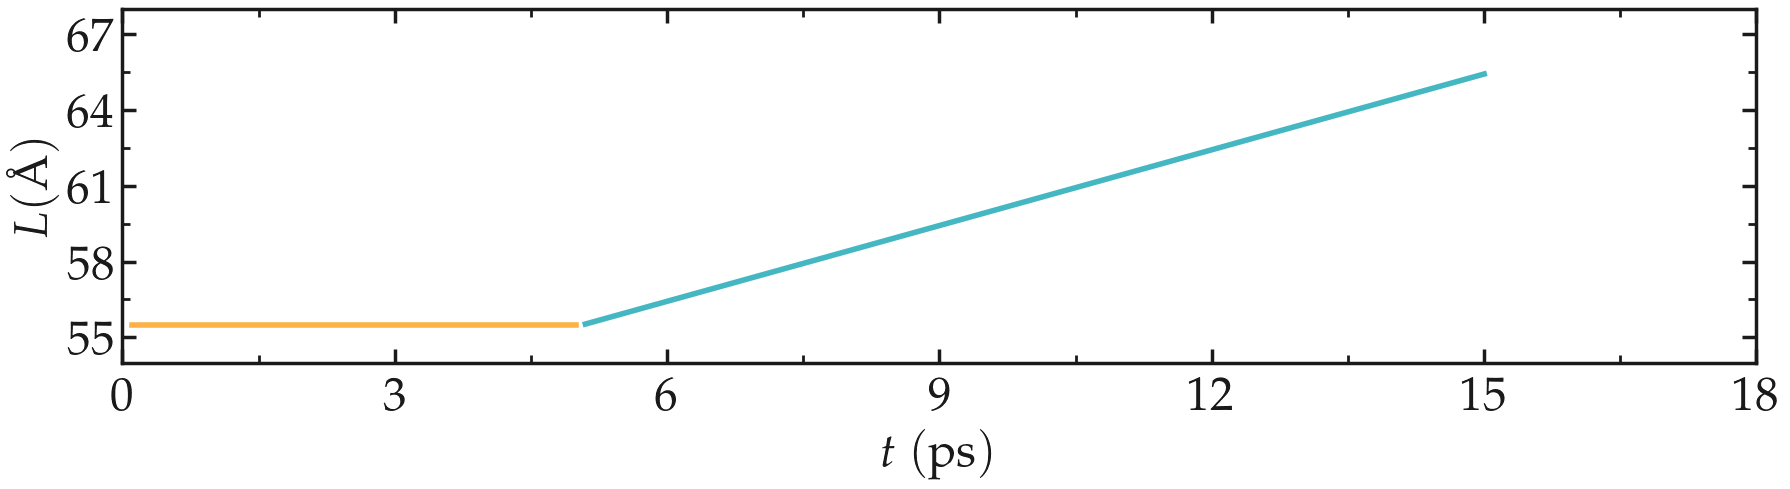

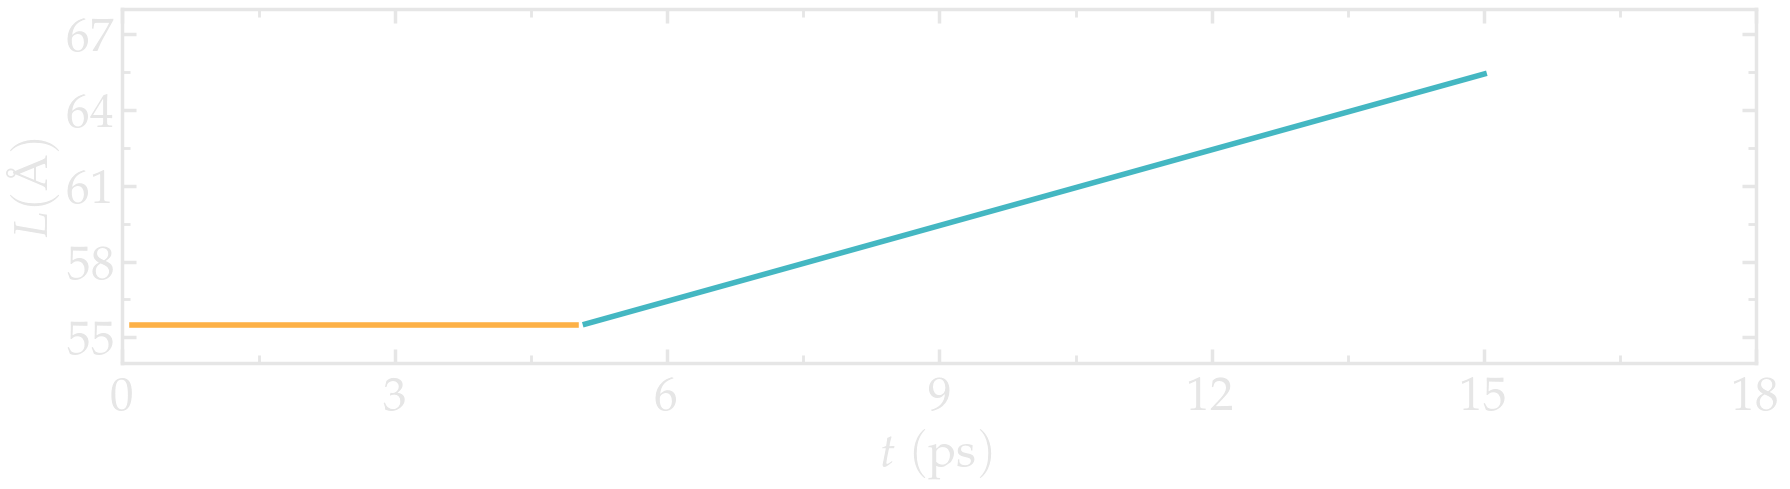

In [4]:
filename = "length-unbreakable"
for dark_mode in [False, True]:

    # Initialise figure
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,5), dark_mode = dark_mode,
                        transparency = True, use_serif=True)
    # Panel 1
    myplt.add_panel()
    #myplt.add_plot(y = force_0[::4], x = length_0[::4], type = "plot",
    #                marker = "o", data_color = 1, markersize = 12)
    myplt.add_plot(y = length_0, x = time_0, type = "plot",
                    marker = "-", data_color = 1, markersize = 12)
    myplt.add_plot(y = length_1, x = time_1, type = "plot",
                    marker = "-", data_color = 0, markersize = 12)
    myplt.complete_panel(ylabel = r'$L \mathrm{(\AA)}$',
                            xlabel = r'$t ~ \mathrm{(ps)}$',
                            xpad = 10, legend=False)
    myplt.set_boundaries(x_ticks=np.arange(0, 18.1, 3.), y_ticks=np.arange(55, 68, 3),
                        x_boundaries=(0, 18), y_boundaries=(54, 68))
    # Finish figure
    myplt.save_figure(filename = filename, saving_path = './')

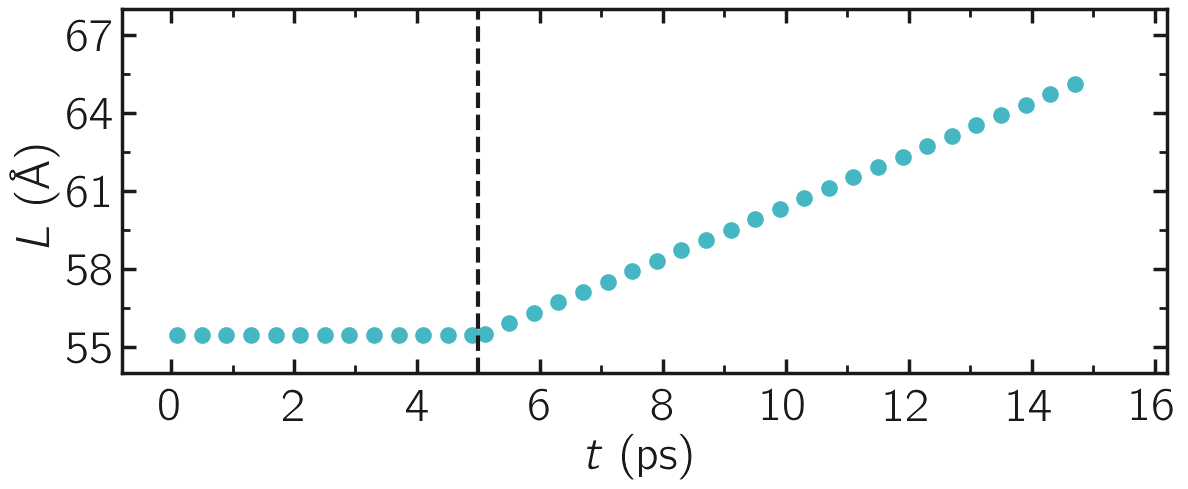

In [18]:
filename = "length-unbreakable-article"
dark_mode = False

# Initialise figure
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,5), dark_mode = False,
                     transparency = False, use_serif=False)
# Panel 1
myplt.add_panel()
#myplt.add_plot(y = force_0[::4], x = length_0[::4], type = "plot",
#                marker = "o", data_color = 1, markersize = 12)
myplt.add_plot(y = length_0[::4], x = time_0[::4], type = "plot",
                marker = "o", data_color = 0, markersize = 12)
myplt.add_plot(y = length_1[::4], x = time_1[::4], type = "plot",
                marker = "o", data_color = 0, markersize = 12)
x = np.linspace(54, 68)
myplt.add_plot(y = x, x = x*0+5, type = "plot",
                marker = "--", data_color = "autogray",
                markersize = 12, data_linewidth = 3)
myplt.complete_panel(ylabel = r'$L ~ \mathrm{(\AA{})}$',
                     xlabel = r'$t ~ \mathrm{(ps)}$',
                     xpad = 10, legend=False)
myplt.set_boundaries(x_ticks=np.arange(0, 16.1, 2.), y_ticks=np.arange(55, 68, 3),
                    x_boundaries=(-0.8, 16.2), y_boundaries=(54, 68))
# Finish figure
myplt.save_figure(filename = filename, saving_path = './')